# Análise das médias de carros brasileiros de 2022 - Tabela FIPE

---

Autores: 
  - George Pontes da Cunha
  - João Estevan Leoncio da Silva Barbosa
  - Matheus Keoma Steinbach
  - Vitor Fernando de Souza Rodrigues
  - Willian Wallace Ribeiro Alves da Silva

e-mails / github: 
  - george.pontes02@gmail.com / https://github.com/georgecnha
  - jestevan12@gmail.com / https://github.com/joaoestevanbarbosa
  - keoma.steinbach@gmail.com / https://github.com/matheuskeomas
  - vitorfbaiano@gmail.com / https://github.com/VitorFRodrigues/
  - willianwra09@gmail.com / https://github.com/willianwrasilva

---

## 1.Introdução

Nos últimos anos a Pandemia tem ocasionado grandes estragos em escala global. Seja nas mais diversas áreas, o ser humano passou por grandes adaptações. No setor econômico não foi diferente, grandes cadeias de fornecimento foram paralizadas por um tempo o que acabou ocasionando atrasos e custos inevitáveis.

Atualmente ainda estamos sentindo dos reflexos nos preços dos itens básicos e voláteis e o mesmo aconteceu com o custo dos veículos. A cadeia de produção de matéria prima como aço e semicondutores (*chips*) tem elevado o custo final os veículos.

Neste trabalho, vamos analisar o custo dos veículos de acordo com a tabela [FIPE](https://veiculos.fipe.org.br/). Os dados foram retirados semi tratados do [kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil).

## 2.Objetivos

### 2.1.Objetivo Geral

Como objetivo geral, temos a intenção de criar um algoritmo de machine learning (ML) para utilizar das informações dos veículos levantados pela tabela para prever custos de outros.

### 2.2.Objetivos Específicos

- Realizar preparação e limpeza dos dados;
- Fazer uma análise exploratória;
- Aplicar função de correlação em busca de features úteis para o algoritmo;
- Criar algoritmo de _Decision Tree Regressor_ e realizar comparações das métricas com as do projeto passado.

## 3.Preparação e Limpeza dos Dados

Vamos iniciar importando as bibliotecas e os dados que serão utilizados para esta seção.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remoção de warnings que possam aparecer durante execução do Notebook
import warnings
warnings.filterwarnings('ignore')

In [0]:
file_location = "dbfs:/FileStore/tables/fipe_cars.csv"
file_type = "csv"
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","


dados = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(dados)

year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0
2021,January,038002-4,mr0qcv97rl,Acura,Legend 3.2/3.5,Gasoline,manual,3.2,1998,24963.0
2021,January,038002-4,lnfvbxbt8q,Acura,Legend 3.2/3.5,Gasoline,manual,3.2,1997,22014.0
2021,January,038002-4,k60nzw7sqt,Acura,Legend 3.2/3.5,Gasoline,manual,3.2,1996,20869.0
2021,January,038002-4,kd43rx4qhn,Acura,Legend 3.2/3.5,Gasoline,manual,3.2,1995,18749.0
2021,January,038002-4,jpnl93zx5x,Acura,Legend 3.2/3.5,Gasoline,manual,3.2,1994,16830.0


In [0]:
#dados = pd.read_csv('datasets/fipe_2022.csv') 
#dados.head()

A descrição dos dados é informada no [Kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil). A título informativo, segue abaixo descrição básica do que cada coluna (feature) informa:

- ```year_of_reference```: ano de referência da observação, ou seja, o ano a que os dados correspondem.
- ```month_of_reference```: mês de referência da observação, ou seja, o mês a que os dados correspondem. O preço médio é calculado pela FIPE a cada mês.
- ```fipe_code```: id único correspondente a um modelo para facilitar a busca na página da FIPE.
- ```authentication```: código único que autentica a consulta no site da FIPE.
- ```brand```: marca do carro.
- ```model```: descrição do carro contendo o nome e demais informações descritivas, conforme tabela FIPE.
- ```fuel```: combustível utilizado pelo carro. Alguns dos carros a gasolina são na verdade álcool e gasolina (flex), o que é comum no Brasil.
- ```gear```: a maneira como as marchas são trocadas.
- ```engine_size```: Tamanho do motor em centímetros cúbicos.
- ```year_model```: esses valores correspondem ao ano de referência, podendo não ser iguais ao ano de fabricação, que no caso corresponderá a um ano anterior ao ```year_model```. Observações com ```year_model = year_of_reference``` significam que o carro é do ano de referência, ou seja, um carro 2021 com ```year_of_reference = 2021``` e ```moth_of_reference = July``` significa que a observação (principalmente o preço médio) corresponde a um carro novo do ano de 2021, do mês de julho. O mesmo modelo pode ter um preço médio diferente para meses diferentes.
- ```avg_price_brl```: preço médio do carro, medido pela FIPE, em Real.

In [0]:
dados.printSchema()

root
 |-- year_of_reference: integer (nullable = true)
 |-- month_of_reference: string (nullable = true)
 |-- fipe_code: string (nullable = true)
 |-- authentication: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- gear: string (nullable = true)
 |-- engine_size: double (nullable = true)
 |-- year_model: integer (nullable = true)
 |-- avg_price_brl: double (nullable = true)



Conforme visto nas informações básicas do dataframe, não há dados nulos e temos 7 colunas do tipo objeto e 5 do tipo numéricas. Como tratamento inicial iremos:

1. Remover ```year_of_reference```;
1. Remover ```fipe_code``` e ```authentication``` por se tratarem de dados do tipo identificadores os quais não serão úteis ao algoritmo ML;
1. Remoção de Outliers das features numéricas.

In [0]:
# Remoção de features desnecessárias
# Remover colunas desnecessárias
dados_limpos = dados.select([c for c in dados.columns if c not in ['year_of_reference', 'fipe_code', 'authentication']])

# dados_limpos = dados.drop(['year_of_reference', 'fipe_code', 'authentication'], axis=1)
# dados_limpos.head()

A respeito da remoção dos outliers, esta será feita na seção a seguir.

## 4.Análise Exploratória

### 4.1.Visualização de dados

Começamos com uma visualização em histograma da distribuição de entradas, frente a algumas das nossas principais métricas de avaliação monetária dos veículos. 

Onde já se observa a relação inversalmente proporcional de Ano e Idade e presença maior dos motores na casa dos 2.0.

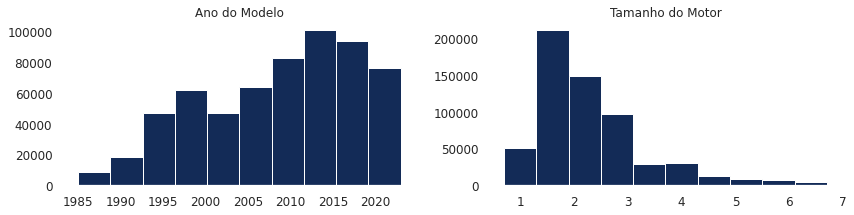

In [0]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12})
fig, axes = plt.subplots(1, 2, figsize=(14,3))
year_model = dados_limpos.toPandas().year_model.hist(ax=axes[0], color="#132B57", grid=False, ).set_title('Ano do Modelo')
engine_size = dados_limpos.toPandas().engine_size.hist(ax=axes[1], color="#132B57", grid=False).set_title('Tamanho do Motor')

A fim de identificar a presença de outliers na medida de preço médio visualizamos a distribuição por histograma, box-plot. Nessa análise inicial vemos a presença grande de _outliers_ nessa medida.

Out[7]: <AxesSubplot:title={'center':'Preço Médio: Box e Whisker Plot'}, xlabel='avg_price_brl'>

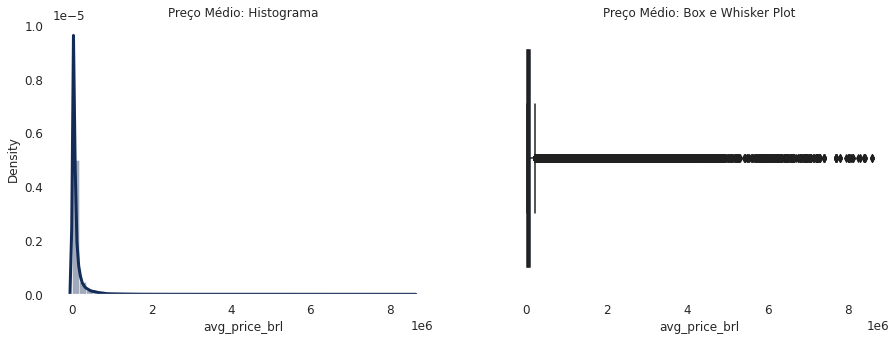

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Preço Médio: Histograma', fontdict={'fontsize':12})
sns.distplot(dados.toPandas().avg_price_brl, color="#132B57", kde_kws={'linewidth':3})

plt.subplot(1,2,2)
plt.title('Preço Médio: Box e Whisker Plot', fontdict={'fontsize':12})
sns.boxplot(dados.toPandas().avg_price_brl, color="#132B57")

Estamos priorizando acertar o preço dos carros mais populares, por conta disto, vamos remover os modelos que estão muito caros ou muito baratos (outliers).

In [0]:
# Importar bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Calcular quartis e IQR
Q1 = dados_limpos.approxQuantile("avg_price_brl", [0.25], 0.05)[0]
Q3 = dados_limpos.approxQuantile("avg_price_brl", [0.75], 0.05)[0]
IQR = Q3 - Q1

# Calcular limites superior e inferior
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Filtrar dados
dados_limpos_s= dados_limpos.filter((col("avg_price_brl") >= lower) & (col("avg_price_brl") <= upper))

# Exibir dados sem outliers
dados_limpos_s.show()

antes = dados_limpos.count()
depois = dados_limpos_s.count()
print(f"Quantidades linhas depois: {depois}")
print(f"Diferença: {antes - depois}")

+------------------+------+--------------------+--------+------+-----------+----------+-------------+
|month_of_reference| brand|               model|    fuel|  gear|engine_size|year_model|avg_price_brl|
+------------------+------+--------------------+--------+------+-----------+----------+-------------+
|           January| Acura|             NSX 3.0|Gasoline|manual|        3.0|      1995|      40374.0|
|           January| Acura|             NSX 3.0|Gasoline|manual|        3.0|      1994|      38939.0|
|           January| Acura|             NSX 3.0|Gasoline|manual|        3.0|      1993|      37648.0|
|           January| Acura|             NSX 3.0|Gasoline|manual|        3.0|      1992|      35962.0|
|           January| Acura|             NSX 3.0|Gasoline|manual|        3.0|      1991|      32863.0|
|           January| Acura|      Legend 3.2/3.5|Gasoline|manual|        3.2|      1998|      24963.0|
|           January| Acura|      Legend 3.2/3.5|Gasoline|manual|        3.2|      

In [0]:
print(f"Quantidades linhas antes: {antes}")
print(f"Quantidades linhas depois: {depois}")
print(f"Diferença: {antes - depois}")

Quantidades linhas antes: 599007
Quantidades linhas depois: 527126
Diferença: 71881


Out[10]: <AxesSubplot:title={'center':'Preço Médio: Box e Whisker Plot'}, xlabel='avg_price_brl'>

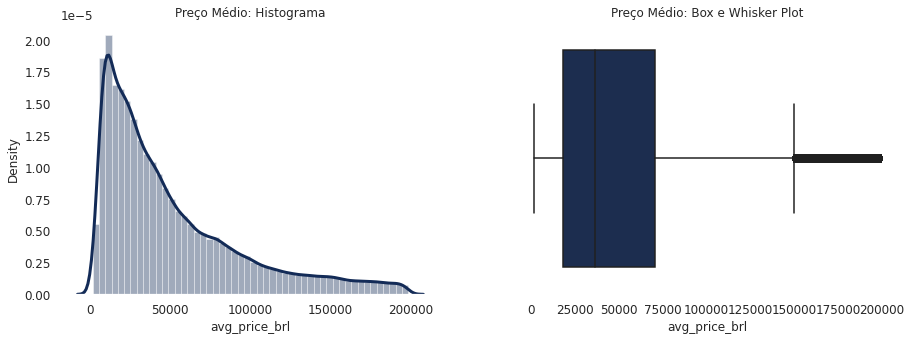

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Preço Médio: Histograma', fontdict={'fontsize':12})
sns.distplot(dados_limpos_s.toPandas().avg_price_brl, color="#132B57", kde_kws={'linewidth':3})

plt.subplot(1,2,2)
plt.title('Preço Médio: Box e Whisker Plot', fontdict={'fontsize':12})
sns.boxplot(dados_limpos_s.toPandas().avg_price_brl, color="#132B57")

Seguimos com a visualização dos dados após a limpeza nos gráficos abaixo.

### 4.2.Mapa de calor de correlação

Vamos dar inicio a nossa análise realizando um mapa de calor, buscando correlação entre as colunas numéricas.

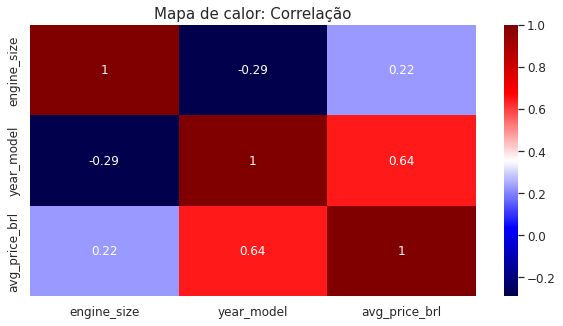

In [0]:
plt.figure(figsize=(10,5))
corr = dados_limpos_s.toPandas().corr(method='pearson').round(4)
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title("Mapa de calor: Correlação", fontdict={'fontsize':15})
plt.show()

A partir do mapa de calor podemos concluir os seguintes pontos:

- O preço do veículo depende bastante ano do modelo;
- O tamanho do motor tem baixa correlação com o ano do modelo e preço médio;

### 4.3. Manipulação dos valores categóricos.

Para utilizarmos os itens categóricos, utilizaremos a função ```String Indexer```.

O String Indexer é uma ferramenta para converter variáveis categóricas que possuem alguma relação de ordem. Ele mapeia os dados de texto em dados numéricos de ```0``` (zero) até ```n-1```, onde ```n``` representa o número de ocorrências diferentes. O índice zero corresponde à maior frequência.

In [0]:
## Separação das colunas em dados categóricos e numéricos

from pyspark.sql.functions import col

categoricos_df = dados_limpos_s.select(col('month_of_reference'), col('brand'), col('model'), col('fuel'), col('gear'))
numericos_df = dados_limpos_s.select(col('engine_size'), col('year_model'), col('avg_price_brl'))


In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

# Separando os dados categóricos em um único dataframe 
cat_df = dados_limpos_s.select(col('month_of_reference'), col('brand'), col('model'), col('fuel'), col('gear'))

# Realizando a transformação de dados categóricos usando StringIndexer
for i in cat_df.columns:
    indexer = StringIndexer(inputCol=i, outputCol=i+'_indexed')
    dados_limpos_s = indexer.fit(dados_limpos_s).transform(dados_limpos_s)

# Unindo os dados numéricos com os categóricos
assembler = VectorAssembler(inputCols=['engine_size', 'year_model', 'avg_price_brl',
                                        'month_of_reference_indexed', 'brand_indexed', 'model_indexed',
                                        'fuel_indexed', 'gear_indexed'],
                            outputCol='features')

dados_limpos_s = assembler.transform(dados_limpos_s)

In [0]:
dados_limpos_s.toPandas().head()

,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_indexed,brand_indexed,model_indexed,fuel_indexed,gear_indexed,features
0,January,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0,0.0,57.0,1556.0,0.0,0.0,"[3.0, 1995.0, 40374.0, 0.0, 57.0, 1556.0, 0.0,..."
1,January,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0,0.0,57.0,1556.0,0.0,0.0,"[3.0, 1994.0, 38939.0, 0.0, 57.0, 1556.0, 0.0,..."
2,January,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0,0.0,57.0,1556.0,0.0,0.0,"[3.0, 1993.0, 37648.0, 0.0, 57.0, 1556.0, 0.0,..."
3,January,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0,0.0,57.0,1556.0,0.0,0.0,"[3.0, 1992.0, 35962.0, 0.0, 57.0, 1556.0, 0.0,..."
4,January,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0,0.0,57.0,1556.0,0.0,0.0,"[3.0, 1991.0, 32863.0, 0.0, 57.0, 1556.0, 0.0,..."


In [0]:
dados_limpos_s = dados_limpos_s.drop("month_of_reference", "brand", "model", "fuel", "gear")


A título de curiosidade, vamos fazer novamente um mapa de calor incluindo os dados categóricos transformados.

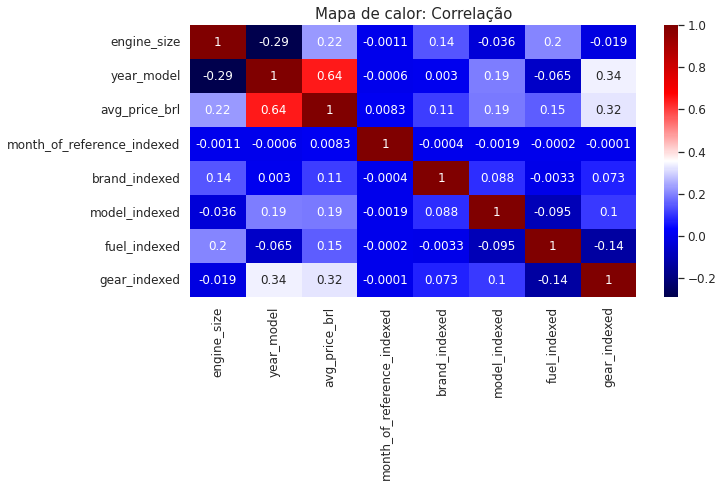

In [0]:
plt.figure(figsize=(10,5))
corr = dados_limpos_s.toPandas().corr(method='pearson').round(4)
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title("Mapa de calor: Correlação", fontdict={'fontsize':15})
plt.show()

Vemos que após aplicação do mapa de calor, o ```avg_price_brl``` (nosso target) possui uma correlação mais forte com os dados que originalmente eram numéricos. 

Vamos optar por manter as features ```fuel``` e ```gear``` enquanto que os demais serão removidos.

In [0]:
dados_limpos_s = dados_limpos_s.drop('month_of_reference_indexed', 'brand_indexed', 'model_indexed')

## 5.Aplicação algoritmos ML

### 5.1. Separação de dados de entrada/saída e treinos/teste

Separação em dados de treino e teste.

In [0]:
# Dividindo em conjuntos de treinamento e teste
train, test = dados_limpos_s.randomSplit([0.8, 0.2], seed=42)




In [0]:
dados_limpos_s.toPandas().head()

,engine_size,year_model,avg_price_brl,fuel_indexed,gear_indexed,features
0,3.0,1995,40374.0,0.0,0.0,"[3.0, 1995.0, 40374.0, 0.0, 57.0, 1556.0, 0.0,..."
1,3.0,1994,38939.0,0.0,0.0,"[3.0, 1994.0, 38939.0, 0.0, 57.0, 1556.0, 0.0,..."
2,3.0,1993,37648.0,0.0,0.0,"[3.0, 1993.0, 37648.0, 0.0, 57.0, 1556.0, 0.0,..."
3,3.0,1992,35962.0,0.0,0.0,"[3.0, 1992.0, 35962.0, 0.0, 57.0, 1556.0, 0.0,..."
4,3.0,1991,32863.0,0.0,0.0,"[3.0, 1991.0, 32863.0, 0.0, 57.0, 1556.0, 0.0,..."


In [0]:
dados_limpos_s.printSchema()

root
 |-- engine_size: double (nullable = true)
 |-- year_model: integer (nullable = true)
 |-- avg_price_brl: double (nullable = true)
 |-- fuel_indexed: double (nullable = false)
 |-- gear_indexed: double (nullable = false)
 |-- features: vector (nullable = true)



Definição de SEED para random states futuros

In [0]:
seed=42

### 5.2. Decision Tree Regressor

In [0]:
# Bibliotecas de processamento de dados
from pyspark.ml.feature import StandardScaler

# Bibliotecas de averiguação de modelo e ajuste
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor

Treinar [Decision Tree Regressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.DecisionTreeRegressor.html#pyspark.ml.regression.DecisionTreeRegressor).

In [0]:
# Criar Modelo Decision Tree 
dtr = DecisionTreeRegressor(labelCol="avg_price_brl", featuresCol='features', maxBins=5340, maxDepth=13)

#maxBins = Param(parent='undefined', name='maxBins', doc='Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature.')

# Treinar o modelo
dtr= dtr.fit(train)
print(dtr)

# Usar test set aqui para que possamos medir a acurácia do modelo
dtrpredictions = dtr.transform(test)



DecisionTreeRegressionModel: uid=DecisionTreeRegressor_4e5e3bb9a615, depth=13, numNodes=16383, numFeatures=8


In [0]:
dtrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="avg_price_brl", metricName="rmse")
dtrevaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="avg_price_brl", metricName="mae")
dtrevaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="avg_price_brl", metricName="r2")

# Evaluate best model
print('RMSE:', dtrevaluator.evaluate(dtrpredictions))
print('MAE:', dtrevaluator_mae.evaluate(dtrpredictions))
print('R2', dtrevaluator_r2.evaluate(dtrpredictions))

RMSE: 26.7782728495373
MAE: 12.932765817895088
R2 0.9999996237868869


#### SAÍDA DO MODELO ANTERIOR:

O modelo anterior tinha menos amostras e obteve os seguintes resultados.

__Melhores Parâmetros__

`{'dtr__splitter': 'best', 'dtr__min_samples_leaf': 3, 'dtr__max_depth': 13}`

__Melhor Estimador__
```
Pipeline(steps=[('std_scaler', StandardScaler()),
                ('dtr',
                 DecisionTreeRegressor(max_depth=13, min_samples_leaf=3,
                                       random_state=42))])
```

__MÉTRICAS__
```
Root Mean Squared Error (RMSE)  is:  20593.36
Mean Absolute Error (MAE) is:  12270.3795
The R-Squared Value (r2) is:  0.8377
```

## 6.Conclusões

Durante a última reunião concluímos que o modelo é satisfatório, pois ao analisar o erro médio absoluto e o erro quadrático médio, obtemos valores na casa dos 26 reais e 12 reais, respectivamente, de modo que torna inviável colocar o modelo em produção por hora.

## 7.Referências


1. [FIPE](https://veiculos.fipe.org.br/)
2. [Dataset](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil)
3. [Decision Tree Regressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.DecisionTreeRegressor.html#pyspark.ml.regression.DecisionTreeRegressor)